In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cancer_Data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.drop(['Unnamed: 32', 'id'], axis='columns', inplace=True)

In [4]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [5]:
df = pd.get_dummies(df, columns=['diagnosis'], drop_first=False)
df.drop(['diagnosis_B'],axis='columns',inplace=True)
df['diagnosis_M'] = df['diagnosis_M'].astype(int)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [6]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [8]:
df0=df[df['diagnosis_M']==0]
df0.shape

(357, 31)

In [9]:
df1=df[df['diagnosis_M']==1]
df1.shape

(212, 31)

<Axes: xlabel='perimeter_mean', ylabel='concavity_mean'>

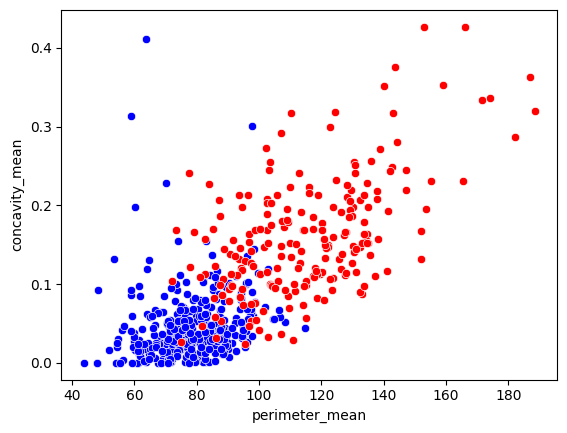

In [10]:
sns.scatterplot(x='perimeter_mean', y='concavity_mean', data=df0, color='blue')
sns.scatterplot(x='perimeter_mean', y='concavity_mean', data=df1, color='red')

In [11]:
X=df.drop(['diagnosis_M'],axis='columns')
Y=df['diagnosis_M']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)

In [13]:
from sklearn.svm import SVC
model=SVC() # We can change the value of C here as we like and it represents Regularization for further information please visit the blog
model.fit(X_train,Y_train)
model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0])

In [14]:
model.score(X_train,Y_train)

0.9186813186813186

In [15]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [16]:
y_pred=model.predict(X_test)
y_true=Y_test
print(confusion_matrix(y_true,y_pred))



[[63  1]
 [14 36]]


In [17]:
accuracy_score(Y_test,y_pred)

0.868421052631579

In [18]:
X.values[568]

array([7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 4.362e-02,
       0.000e+00, 0.000e+00, 1.587e-01, 5.884e-02, 3.857e-01, 1.428e+00,
       2.548e+00, 1.915e+01, 7.189e-03, 4.660e-03, 0.000e+00, 0.000e+00,
       2.676e-02, 2.783e-03, 9.456e+00, 3.037e+01, 5.916e+01, 2.686e+02,
       8.996e-02, 6.444e-02, 0.000e+00, 0.000e+00, 2.871e-01, 7.039e-02])

In [19]:
model.predict([[7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 4.362e-02,
       0.000e+00, 0.000e+00, 1.587e-01, 5.884e-02, 3.857e-01, 1.428e+00,
       2.548e+00, 1.915e+01, 7.189e-03, 4.660e-03, 0.000e+00, 0.000e+00,
       2.676e-02, 2.783e-03, 9.456e+00, 3.037e+01, 5.916e+01, 2.686e+02,
       8.996e-02, 6.444e-02, 0.000e+00, 0.000e+00, 2.871e-01, 7.039e-02]])

c:\Users\AZAM KHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Confusion Matrix 
 [[63  1]
 [14 36]]
Classification_Report 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89        64
           1       0.97      0.72      0.83        50

    accuracy                           0.87       114
   macro avg       0.90      0.85      0.86       114
weighted avg       0.89      0.87      0.86       114



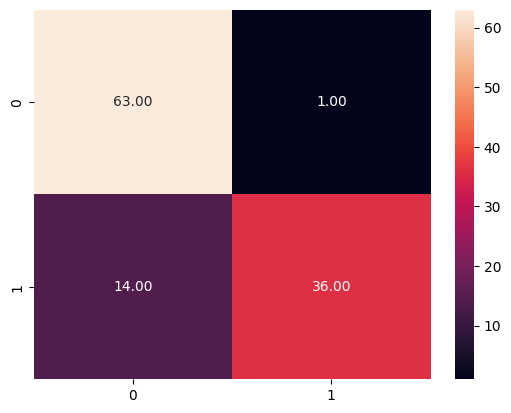

In [21]:
print('Confusion Matrix \n',confusion_matrix(Y_test, y_pred))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot = True, fmt = '.2f')
print('Classification_Report \n',classification_report(Y_test, y_pred))

In [22]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_model = SVC(C=2, gamma='scale', kernel='linear')

In [25]:
grid_model.fit(X_train,Y_train)

SVC(C=2, kernel='linear')

In [26]:
grid_model.score(X_train,Y_train)

0.9648351648351648

In [27]:
grid_model_y_pred = grid_model.predict(X_test)

In [28]:
accuracy_score(Y_test,grid_model_y_pred)

0.956140350877193

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 2: Apply standard scaling after splitting
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)        # Transform the test data using the training data scaler

# Step 3: Use the best-found parameters from GridSearchCV
best_model = SVC(C=2, gamma='scale', kernel='linear')

# Step 4: Train the model
best_model.fit(X_train_scaled, Y_train)
Y_pred = best_model.predict(X_test_scaled)

# Step 5: Evaluate the model



In [30]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix



In [31]:
best_model.score(X_train_scaled,Y_train)

0.992462311557789

In [32]:
accuracy_score(Y_test,Y_pred)

0.9766081871345029

In [33]:
X.values[320]

array([1.025e+01, 1.618e+01, 6.652e+01, 3.242e+02, 1.061e-01, 1.111e-01,
       6.726e-02, 3.965e-02, 1.743e-01, 7.279e-02, 3.677e-01, 1.471e+00,
       1.597e+00, 2.268e+01, 1.049e-02, 4.265e-02, 4.004e-02, 1.544e-02,
       2.719e-02, 7.596e-03, 1.128e+01, 2.061e+01, 7.153e+01, 3.904e+02,
       1.402e-01, 2.360e-01, 1.898e-01, 9.744e-02, 2.608e-01, 9.702e-02])

In [34]:
Y.values[320]

np.int64(0)

In [35]:
best_model.predict(scaler.transform([[1.025e+01, 1.618e+01, 6.652e+01, 3.242e+02, 1.061e-01, 1.111e-01,
       6.726e-02, 3.965e-02, 1.743e-01, 7.279e-02, 3.677e-01, 1.471e+00,
       1.597e+00, 2.268e+01, 1.049e-02, 4.265e-02, 4.004e-02, 1.544e-02,
       2.719e-02, 7.596e-03, 1.128e+01, 2.061e+01, 7.153e+01, 3.904e+02,
       1.402e-01, 2.360e-01, 1.898e-01, 9.744e-02, 2.608e-01, 9.702e-02]]))

c:\Users\AZAM KHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [36]:
import pickle
with open('breast_cancer_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('breast_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [37]:
X_test_scaled[0]

array([-0.48313229, -0.13285829, -0.46029654, -0.4962716 ,  0.26825524,
        0.04881894, -0.10317674, -0.27160323,  0.45428537,  0.14726589,
       -0.02995199, -0.30774709, -0.17916703, -0.21111977, -0.03243804,
       -0.34753805, -0.17488076, -0.24989363, -0.31879001, -0.07738565,
       -0.27480509, -0.14401878, -0.34241195, -0.35778107,  0.47089943,
       -0.07603328, -0.00713329, -0.19338258,  0.21048039,  0.22648723])

In [38]:
X_test[:10]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.14260,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.11930,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.14500,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.13450,0.2118,0.1797,0.06918,0.2329,0.08134
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,0.16500,0.8681,0.9387,0.26500,0.4087,0.12400
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,27.66,25.80,195.00,2227.0,0.12940,0.3885,0.4756,0.24320,0.2741,0.08574
29,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,20.01,19.52,134.90,1227.0,0.12550,0.2812,0.2489,0.14560,0.2756,0.07919
81,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,0.06902,...,15.53,23.19,96.66,614.9,0.15360,0.4791,0.4858,0.17080,0.3527,0.10160
477,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,0.05536,...,15.14,21.80,101.20,718.9,0.09384,0.2006,0.1384,0.06222,0.2679,0.07698


In [39]:
Y_test[204]

np.int64(0)

In [40]:
print(model.feature_names_in_)
print("Total Features in Model:", len(model.feature_names_in_))


['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']
Total Features in Model: 30
